# Following models are tried out in the following code 


1.   Random Forest
2.   Linear SVC
3.   Multinomial NB
4.   Logistic Regression



#### Important files are imported

In [18]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [19]:
combined = pd.read_csv('/content/drive/MyDrive/dataset_patent/generated_files/cleaned_data_150k.csv')

In [20]:
# Making experiment on 10K samples 
combined_10k = combined.sample(n=10000)

In [21]:
combined_10k.head()

,text,target
79326,"According to the first invention, the fuel inj...",1
58848,There is a need for a reservoir that allows a ...,2
84941,An internal combustion engine of the present i...,0
145773,A collision avoidance assistance device accord...,0
125672,"According to the present disclosure, crosslink...",1


In [22]:
# Applying tfidf vectorizor on our text data
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [23]:
# Generating features and labels for the further processing
features = tfidf.fit_transform(combined_10k.text).toarray()
labels = combined_10k.target
features.shape

(10000, 28349)

In [24]:
# Making datasplit and fit the tfidf transformer default split is 75-25 

X_train, X_test, y_train, y_test = train_test_split(combined_10k['text'], combined_10k['target'], test_size=0.2, random_state = 3)
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [25]:
print(X_train.shape)
print(X_test.shape)

(8000,)
(2000,)


In [26]:
# Defining different models which we want to apply
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# For calculating model performance applying cross validation 
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

# Saving the cross-validation score in the dataframe 
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])    

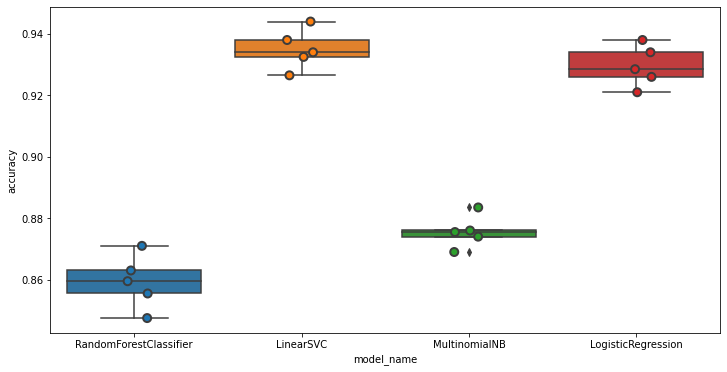

In [27]:
# Plotting accuracy score for these different models 
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

#### From above models it seems that LinearSVC model perform better than others. So, Let check confusion matrix score for it separately 

In [28]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    features, labels, combined_10k.index, test_size=0.2, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

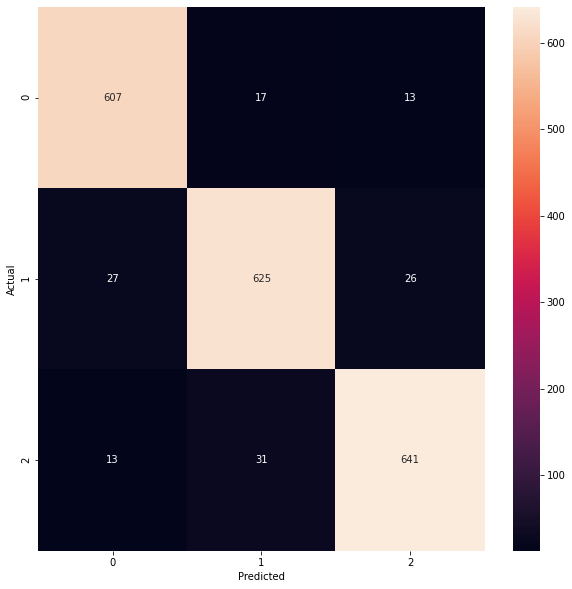

In [29]:
# Presenting confusion matrix for the model using scikit learn 
# labels 0,1,2 represent neutral, positive, and negative dataset

conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=[0,1,2], yticklabels=[0,1,2])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()